In [1]:
#ket noi colab voi google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#ket noi voi cac thu vien can thiet
import cv2 as cv
import numpy as np
import os 
import tensorflow as tf
import matplotlib.pyplot as plt
import pickle
import random
from tqdm import tqdm 

[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   2   2 ...   0   0   0]
 ...
 [  0   0   0 ... 166  21 110]
 [  0   0   0 ...  15  57  68]
 [  0   0   0 ...  25  53  75]]


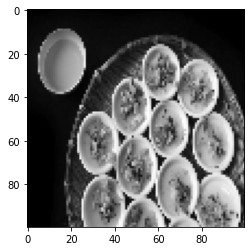

In [3]:
#tap training_data gom co 10 mon an
#chuyen doi cac anh sang mau xam va resize cac anh thanh kich thuoc 100X100
datadir = "/content/drive/MyDrive/FoodVN/10loaimonanVN"
categories=['banh beo','banh trang nuong','bun bo hue','bun dau mam tom','bun rieu','chao long','com tam','hu tieu','my quang','pho']
img_size=100
for category in categories:
  path=os.path.join(datadir,category)
  for img in os.listdir(path):
    img_array = cv.imread(os.path.join(path,img),cv.IMREAD_GRAYSCALE)
    new_array = cv.resize(img_array,(img_size,img_size))
    print(new_array)
    plt.imshow(new_array,cmap='gray')
    plt.show()
    break
  break

In [4]:
#tao ra training data
training_data=[]
def create_traning_data():

  for category in categories:
    path = os.path.join(datadir,category)
    class_num = categories.index(category)

    for img in tqdm(os.listdir(path)):
      try:
        img_array = cv.imread(os.path.join(path,img),cv.IMREAD_GRAYSCALE)
        new_array = cv.resize(img_array,(img_size,img_size))
        training_data.append([new_array,class_num])
      except Exception as e:
        pass
create_traning_data()
print(len(training_data))

100%|██████████| 564/564 [00:15<00:00, 36.96it/s]

6803


In [5]:
#luu cac tinh chat cua tap training_data vao x, y (x:picture), (y:label)
x=[]
y=[]
for features, label in training_data :
  x.append(features)
  y.append(label)
x=np.array(x).reshape(-1,img_size,img_size,1)
y=np.array(y)
print('x',x.shape)
print('y',y.shape)

x (6803, 100, 100, 1)
y (6803,)


In [6]:
#luu cac bien x, y la file.pickle vao google drive
pickle_out=open("/content/drive/MyDrive/FoodVN/save/x.pickle","wb")
pickle.dump(x,pickle_out)
pickle_out.close()

pickle_out=open("/content/drive/MyDrive/FoodVN/save/y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [7]:
#Bat dau xay dung mo hinh
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D
from keras.layers.convolutional import MaxPooling2D
from tensorflow.keras.utils import to_categorical

In [8]:
#lay cac bien x, y minh da luu trong file ra de co the xay dung mo hinh
pickle_in = open("/content/drive/MyDrive/FoodVN/save/x.pickle","rb")
X= pickle.load(pickle_in)

pickle_in = open("/content/drive/MyDrive/FoodVN/save/y.pickle","rb")
y= pickle.load(pickle_in)

X=X/255.0
print('X',X.shape)
print('y',y.shape)

X (6803, 100, 100, 1)
y (6803,)


In [9]:
#dung ham to_categorical de tao ra cac cot cho moi danh muc
y= to_categorical(y,10)

In [10]:
#su dung mang CNN co 3 convolution layers, filter size 3x3, Pooling size 2x2, ham kich hoat relu: Fully-Connected, 
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(100,100,1)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(10,activation='softmax'))

In [11]:
#bat dau huan luyen mo hinh
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import SGD,Adam
opt =Adam()
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(X,y,epochs=30,batch_size=64,validation_split=0.2,verbose=1)

Epoch 1/30
86/86 [==============================] - 26s 164ms/step - loss: 2.2898 - accuracy: 0.1762 - val_loss: 5.7739 - val_accuracy: 0.0000e+00
Epoch 2/30
86/86 [==============================] - 13s 153ms/step - loss: 1.9727 - accuracy: 0.2238 - val_loss: 9.2699 - val_accuracy: 0.0073
Epoch 3/30
86/86 [==============================] - 13s 153ms/step - loss: 1.7928 - accuracy: 0.3227 - val_loss: 12.1938 - val_accuracy: 0.0000e+00
Epoch 4/30
86/86 [==============================] - 13s 153ms/step - loss: 1.6306 - accuracy: 0.3886 - val_loss: 10.2507 - val_accuracy: 0.0066
Epoch 5/30
86/86 [==============================] - 13s 153ms/step - loss: 1.4766 - accuracy: 0.4638 - val_loss: 11.4337 - val_accuracy: 0.0265
Epoch 6/30
86/86 [==============================] - 13s 153ms/step - loss: 1.2477 - accuracy: 0.5470 - val_loss: 13.7450 - val_accuracy: 0.0000e+00
Epoch 7/30
86/86 [==============================] - 13s 153ms/step - loss: 0.9964 - accuracy: 0.6442 - val_loss: 18.2376 - val

In [15]:
model.save('FoodVN.h5')

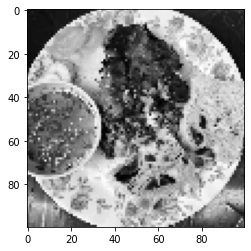

In [13]:
img_test='/content/nhung-quan-com-tam-ngon-o-sai-gon-1..jpg'
categories=['banh beo','banh trang nuong','bun bo hue','bun dau mam tom','bun rieu','chao long','com tam','hu tieu','my quang','pho']
def prepare (filepath):
  img_size=100
  img_array=cv.imread(filepath, cv.IMREAD_GRAYSCALE)
  new_array=cv.resize(img_array,(100,100))
  new_array=new_array/255.0
  return new_array.reshape(-1,100,100,1)
plt.imshow(np.squeeze(prepare(img_test)),cmap='gray')
plt.show()

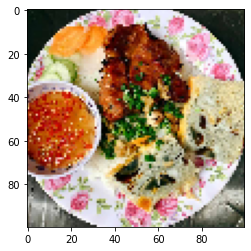

Prediction value com tam


In [14]:
from keras.preprocessing.image import load_img,img_to_array
img1=load_img(img_test,target_size=(100,100))
img1_tensor=img_to_array(img1)
img1_tensor=np.expand_dims(img1_tensor,axis=0)
img1_tensor /= 255
plt.imshow(np.squeeze(img1_tensor))
plt.show()
prediction=model.predict([prepare(img_test)])
print('Prediction value',categories[int(np.argmax(prediction))])

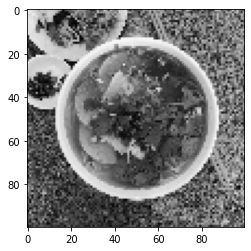

In [ ]:
img_test='/content/bun-bo-hue-ba-xin.jpg'
categories=['banh beo','banh trang nuong','bun bo hue','bun dau mam tom','bun rieu','chao long','com tam','hu tieu','my quang','pho']
def prepare (filepath):
  img_size=100
  img_array=cv.imread(filepath, cv.IMREAD_GRAYSCALE)
  new_array=cv.resize(img_array,(100,100))
  new_array=new_array/255.0
  return new_array.reshape(-1,100,100,1)
plt.imshow(np.squeeze(prepare(img_test)),cmap='gray')
plt.show()

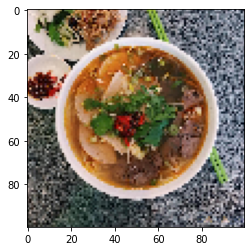

Prediction value bun bo hue


In [ ]:
from keras.preprocessing.image import load_img,img_to_array
img1=load_img(img_test,target_size=(100,100))
img1_tensor=img_to_array(img1)
img1_tensor=np.expand_dims(img1_tensor,axis=0)
img1_tensor /= 255
plt.imshow(np.squeeze(img1_tensor))
plt.show()
prediction=model.predict([prepare(img_test)])
print('Prediction value',categories[int(np.argmax(prediction))])

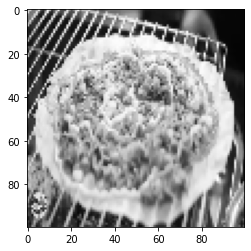

In [ ]:
img_test='/content/Banh-trang-nuong.webp'
categories=['banh beo','banh trang nuong','bun bo hue','bun dau mam tom','bun rieu','chao long','com tam','hu tieu','my quang','pho']
def prepare (filepath):
  img_size=100
  img_array=cv.imread(filepath, cv.IMREAD_GRAYSCALE)
  new_array=cv.resize(img_array,(100,100))
  new_array=new_array/255.0
  return new_array.reshape(-1,100,100,1)
plt.imshow(np.squeeze(prepare(img_test)),cmap='gray')
plt.show()

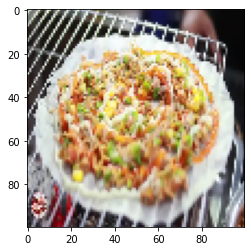

Prediction value banh trang nuong


In [ ]:
from keras.preprocessing.image import load_img,img_to_array
img1=load_img(img_test,target_size=(100,100))
img1_tensor=img_to_array(img1)
img1_tensor=np.expand_dims(img1_tensor,axis=0)
img1_tensor /= 255
plt.imshow(np.squeeze(img1_tensor))
plt.show()
prediction=model.predict([prepare(img_test)])
print('Prediction value',categories[int(np.argmax(prediction))])

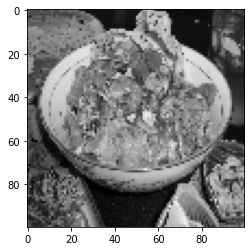

In [ ]:
img_test='/content/Mi Quang Hu Tieu 066.JPG'
categories=['banh beo','banh trang nuong','bun bo hue','bun dau mam tom','bun rieu','chao long','com tam','hu tieu','my quang','pho']
def prepare (filepath):
  img_size=100
  img_array=cv.imread(filepath, cv.IMREAD_GRAYSCALE)
  new_array=cv.resize(img_array,(100,100))
  new_array=new_array/255.0
  return new_array.reshape(-1,100,100,1)
plt.imshow(np.squeeze(prepare(img_test)),cmap='gray')
plt.show()

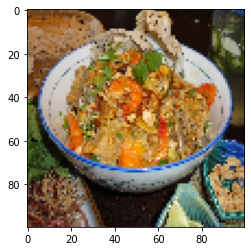

Prediction value banh trang nuong


In [ ]:
from keras.preprocessing.image import load_img,img_to_array
img1=load_img(img_test,target_size=(100,100))
img1_tensor=img_to_array(img1)
img1_tensor=np.expand_dims(img1_tensor,axis=0)
img1_tensor /= 255
plt.imshow(np.squeeze(img1_tensor))
plt.show()
prediction=model.predict([prepare(img_test)])
print('Prediction value',categories[int(np.argmax(prediction))])

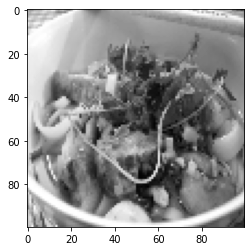

In [ ]:
img_test='/content/Mi-Quang-447.webp'
categories=['banh beo','banh trang nuong','bun bo hue','bun dau mam tom','bun rieu','chao long','com tam','hu tieu','my quang','pho']
def prepare (filepath):
  img_size=100
  img_array=cv.imread(filepath, cv.IMREAD_GRAYSCALE)
  new_array=cv.resize(img_array,(100,100))
  new_array=new_array/255.0
  return new_array.reshape(-1,100,100,1)
plt.imshow(np.squeeze(prepare(img_test)),cmap='gray')
plt.show()

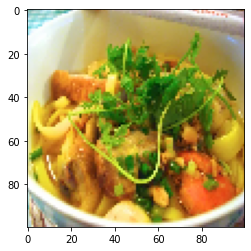

Prediction value chao long


In [ ]:
from keras.preprocessing.image import load_img,img_to_array
img1=load_img(img_test,target_size=(100,100))
img1_tensor=img_to_array(img1)
img1_tensor=np.expand_dims(img1_tensor,axis=0)
img1_tensor /= 255
plt.imshow(np.squeeze(img1_tensor))
plt.show()
prediction=model.predict([prepare(img_test)])
print('Prediction value',categories[int(np.argmax(prediction))])